In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from soMaps import SOM

## 4.1

In [2]:
data = np.genfromtxt('data_lab2/animals.dat',
                     dtype=None,
                     delimiter=',')
data = data.reshape(32,84) # species x attributes
names = np.loadtxt("data_lab2/animalnames.txt", dtype=str)

In [3]:
som = SOM(num_features=84, data=data, num_nodes=100, seed = 21)
som.train(20,0.2,data,50,1,False)

In [4]:
results = {n:0 for n in names}
for idx, n in enumerate(names):
    index = som.get_closest_node(idx)
    results[n] = index
results = dict(sorted(results.items(), key=lambda item: item[1]))

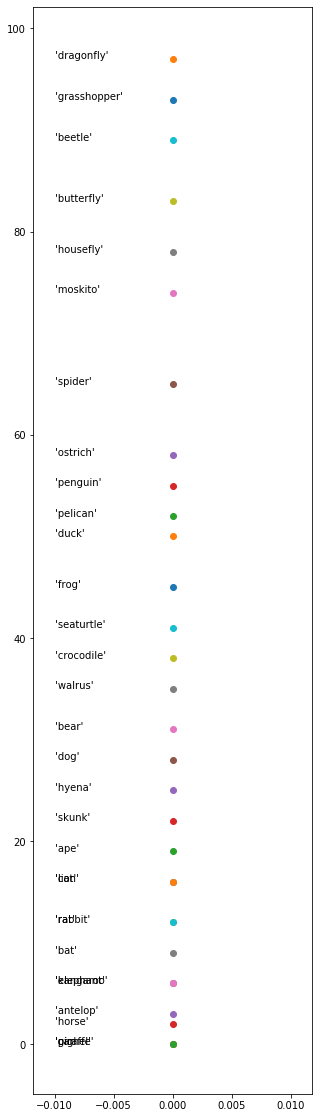

In [5]:
plt.figure(figsize=(5,20))
for key in results.keys():
    v = results[key]
    plt.scatter(0,v)
    plt.text(-0.01,v,key)

## 4.2

In [6]:
#load data
cities = np.genfromtxt('data_lab2/cities.dat',
                     dtype=float,
                     delimiter=',',
                     skip_header=3)
cities = cities[:,:2]

In [7]:
# init and train model
som2 = SOM(num_features=2, data=cities, num_nodes=10, seed=2)
som2.train(100,0.3,cities,2,0,True)

In [8]:
#sort results
results = {i:0 for i in range(10)}
for idx in range(10):
    index = som2.get_closest_node(idx)
    results[idx] = index
results = dict(sorted(results.items(), key=lambda item: item[1]))
path = np.array([key for key in results.keys()])

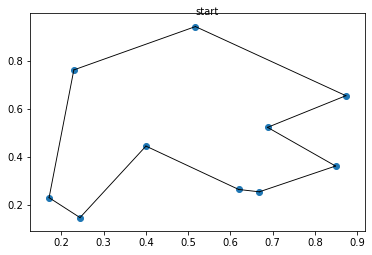

In [9]:
#plot results
plt.scatter(cities[:,0],cities[:,1])
# label starting point
start = path[0]
pos = cities[start]
plt.text(pos[0],pos[1]+0.05,'start')
#plot path
for i,c in enumerate(path):
    x1 = cities[c]
    x2 = cities[path[(i+1)%len(path)]]
    plt.plot([x1[0],x2[0]],[x1[1],x2[1]],color='black',linewidth=0.9)

## 4.3

In [15]:
import random
import matplotlib.colors as mcolors

In [16]:
votes = np.genfromtxt('data_lab2/votes.dat',
                     dtype=float,
                     delimiter=',')
votes = votes.reshape(349,31)
party = np.genfromtxt('data_lab2/mpparty.dat',
                     dtype=int,
                     delimiter=',',
                     skip_header=3)
colors = np.array([key for key in mcolors.CSS4_COLORS.keys()])
random.shuffle(colors)

In [17]:
som3 = SOM(num_features=31, data=votes, num_nodes=100, seed=22, grid=(10,10))
som3.train(30,0.2,votes,100,2,False)

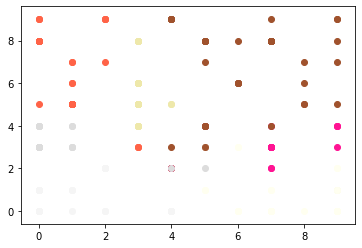

In [18]:
for i,p in enumerate(party):
    w_id = som3.get_closest_node(i)
    pos = som3.mapping[w_id]
    c = colors[p]
    plt.scatter(pos[0],pos[1],color = c)

In [19]:
sex = np.genfromtxt('data_lab2/mpsex.dat',
                     dtype=int,
                     delimiter=',',
                     skip_header=1)

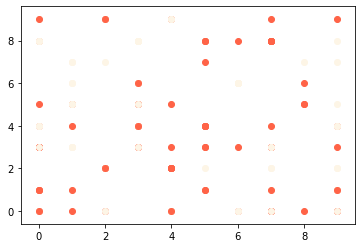

In [20]:
for i,p in enumerate(sex):
    w_id = som3.get_closest_node(i)
    pos = som3.mapping[w_id]
    c = colors[p]
    plt.scatter(pos[0],pos[1],color = c)

In [21]:
district = np.genfromtxt('data_lab2/mpdistrict.dat',
                     dtype=int,
                     delimiter=',',
                     skip_header=1)

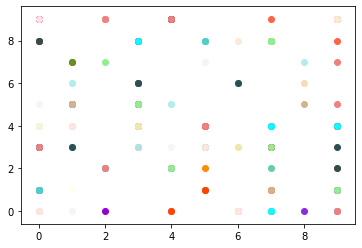

In [22]:
for i,p in enumerate(district):
    w_id = som3.get_closest_node(i)
    pos = som3.mapping[w_id]
    c = colors[p]
    plt.scatter(pos[0],pos[1],color = c)